# Performing EDA for incident impact prediction
we have performed EDA intially by doing the manual process, and futher we have speed up the EDA process using "sweet viz" , "pandas profilling", " Dtale" 


In [1]:
import pandas as pd
import numpy as np 
import sweetviz as sv 
import pandas_profiling as pp
import dtale
import seaborn as sns 
from matplotlib import pyplot as plt 

# import the dataset 


In [2]:
service=pd.read_csv("sample_service.xlsx - Sheet1.csv")

In [3]:
service.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,INC0000045,NaN,True,0,0,3,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2/29/16 4:40,Created by 171,...,Subcategory 215,Symptom 471,Group 70,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?


#  we have replaced special character "?" with nan.

In [4]:
service.replace('?', np.nan,inplace=True)

In [5]:
service.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN
2,INC0000045,NaN,True,0,0,3,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,2/29/16 1:16,Created by 6,...,Subcategory 170,Symptom 72,Group 56,NaN,True,False,2 - Medium,Do Not Notify,NaN,NaN
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,2/29/16 4:40,Created by 171,...,Subcategory 215,Symptom 471,Group 70,Resolver 89,True,False,2 - Medium,Do Not Notify,NaN,NaN


In [6]:
service.shape

(349, 25)

#  we have done the visualization to understand the data 

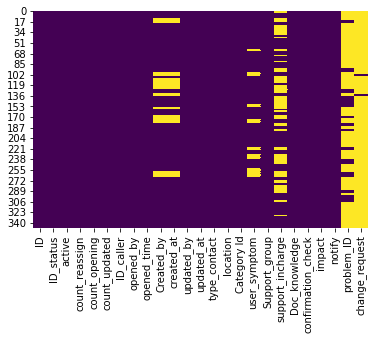

In [7]:
sns.heatmap(service.isnull(),cbar=False,cmap='viridis')

#
we can observe that created by , created at, has missing values nearly of about 40% 
of data  and in support incharge 80% of the data is missing and in problem id and change request nearly 90-95% of the data is missing.

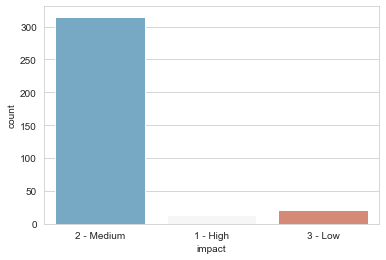

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='impact',data=service,palette='RdBu_r')

#
The above count plot says that there are nearly around 300 2-medium issues, around 10 1-high issues and  15 3-low medium issues which causes the impact.

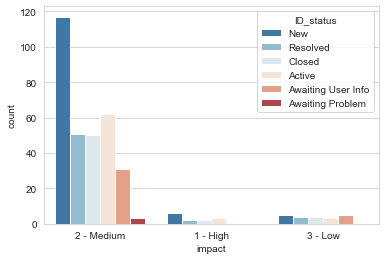

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='impact',hue='ID_status',data=service,palette='RdBu_r')

#
The above visualization shows the impact with respect to the ID status.

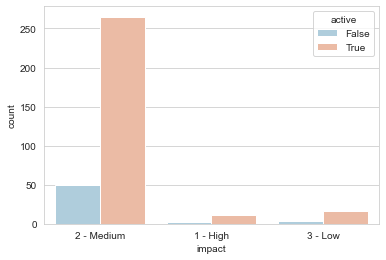

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='impact',hue='active',data=service,palette='RdBu_r')

# 
impact with respect to status of the issues.

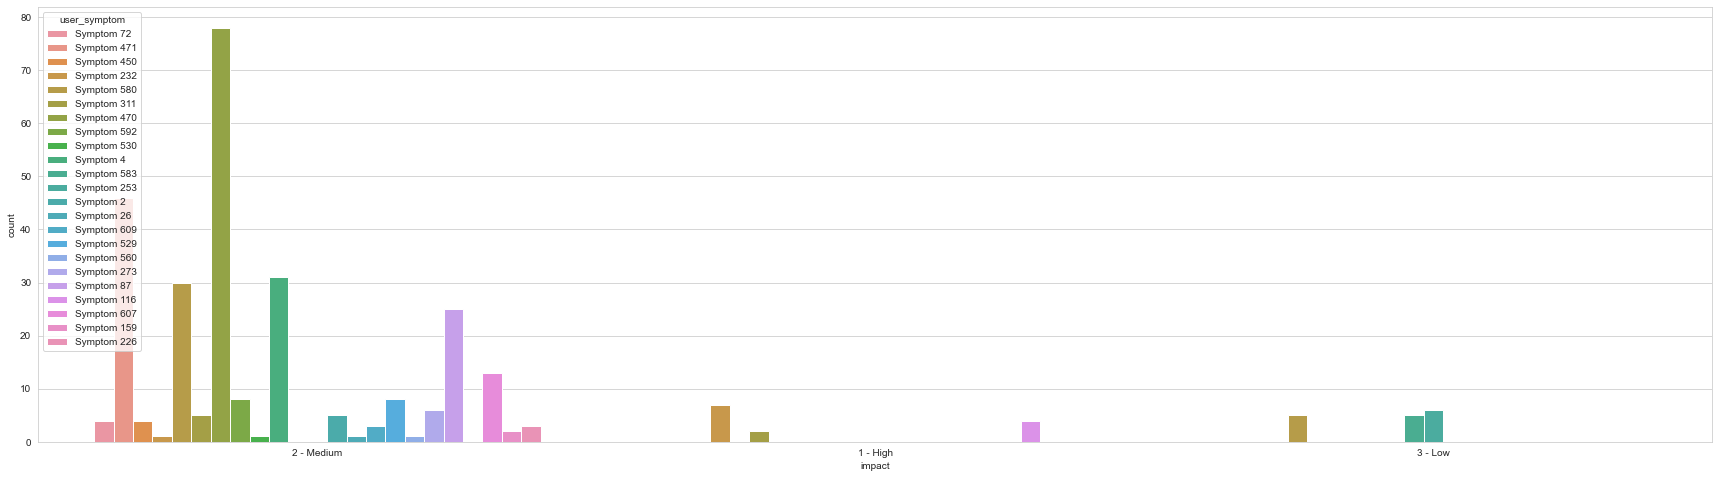

In [11]:
plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
sns.countplot(x='impact',hue='user_symptom',data=service)

# 
impact with respect to user symptoms 

In [12]:
service.corr()

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check
active,1.000000,-0.040621,-0.043858,-0.271440,NaN,-0.158888
count_reassign,-0.040621,1.000000,0.280939,0.593666,NaN,0.015397
count_opening,-0.043858,0.280939,1.000000,0.341662,NaN,-0.015993
count_updated,-0.271440,0.593666,0.341662,1.000000,NaN,0.403637
Doc_knowledge,NaN,NaN,NaN,NaN,NaN,NaN
confirmation_check,-0.158888,0.015397,-0.015993,0.403637,NaN,1.000000


# speeding up the EDA process using Dtale 

In [13]:
 eda =dtale.show(service)

In [17]:
eda

# EDA process using sweet viz

In [14]:
sweet_report = sv.analyze(service)
sweet_report.show_html('EDA using sweet viz.html')


Report EDA using sweet viz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# EDA process using pandas profiling 

In [15]:
EDA_report= pp.ProfileReport(service)
EDA_report.to_file(output_file='EDA using pandas profiling.html')

C:\Users\Anup w\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:101: UserWarning:

There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')

